In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

*   age: age in year
*   sex: 1 = male + O = female
*   cp: chest pain type
*   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
*   chol: serum cholestoral in mg/dl
*   fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg: resting electrocardiographic results
*   thalach: maximum heart rate achieved
*   exang: exercise induced angina (1 = yes; 0 = no)
*   oldpeak:  ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment
*   ca: number of major vessels (0-3) colored by flourosopy
*   thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
*   target: 0 = no disease + 1 = disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/AI_ML/main/datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Get general info about the dataset. Are there any values missing?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are 2 values for target (0 and 1), so this is a binary classification.   
Before we can start the classification, we have to know if this is a skewed dataset.

1    526
0    499
Name: target, dtype: int64

What is X and what is y?

Use min-max scaling on X.  

Put the transformed data back into a dataframe.  
Take a look at the data in the dataframe.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


Determine X_train, y_train, X_test and y_test. Since we have no extra information, we can ignore stratified sampling. 

What is the number of records in X_train en X_test?

768
257


Use the SGD classifier to do the classification.  
Make sure the results are reproducible.

SGDClassifier(random_state=42)

0.7704280155642024


Use K-fold cross-validation to determine the accuracy of the model. 

Give the confusion matrix.

[[289  78]
 [ 39 362]]


Visualize the confusion matrix

Text(88.68, 0.5, 'Actual class')

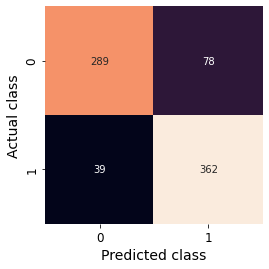

Give the number of True Negatives, True Positives, False Positives, False Negatives.  
TN = 289   
FN = 39    
FP = 78   
TP = 362

39


What is worse in this case: False Positives or False Negatives?

Calculate the precision and the recall using the above values.  
The precision is: 0.8227272727272728  
The recall is: 0.9027431421446384

0.8227272727272728
0.9027431421446384


Calculate the precision and recall using sklearn  
The precision is: 0.8227272727272728  
The recall is: 0.9027431421446384

0.8227272727272728
0.9027431421446384


What is meant with precision and recall in this context?

Calculate F1 score using the above values.  
F1 is: 0.8608799048751486


F1 is: 0.8608799048751486


Calculate F1 score using the sklearn.  
F1 is: 0.8608799048751486

F1 is: 0.8608799048751486


What would be a good value for the threshold based on this plot?


Perhaps it's a good idea to use another classifier?  
Use a RandomForestClassifier to make predictions.

Show the confusion matrix

[[339  28]
 [ 21 380]]


Calculate precision, recall and F1-score and compare to the SGDClassifier


0.9476309226932669


0.980544747081712
